In [1]:
import os
print(os.getcwd())

c:\python\DAT264x Identifying Appliances from Energy Use Spectrogram


In [2]:
# HomeWork
# 如何去讀取所有的訓練資料 (c,v) 一組

# y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
y = pd.read_csv('./data/train_labels.csv')
y[:3]

,id,appliance
0,1000,4
1,1001,9
2,1002,4


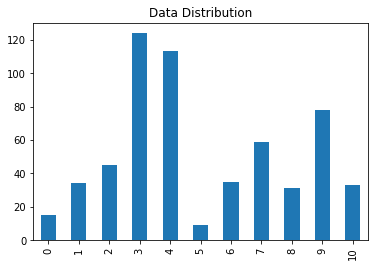

In [3]:
plt.title('Data Distribution')
y.appliance.value_counts().sort_index().plot(kind='bar')
plt.show()

In [4]:
y[y.id==1000].appliance.values[0]

4

In [5]:
# 分析檔案名稱
filename = './data/train/1000_c.png'
filename.split('/')[-1].split('.')[0].split('_')[0]

#filename.endswith('c.png')

'1000'

In [6]:
# X 讀取 all training data (image)
# os.walk 從作業系統中每讀取一筆檔案名稱 進行影像讀取 加上 標籤對應

image_c = [] # 每一的檔案的影像 電流訊號轉的影像
image_v = [] # 每一的檔案的影像 電壓訊號轉的影像
data = [] # 每一的檔案對應appliance 數字

import os
for root, dirs, files in os.walk("./data/train/", topdown=False):
    for filename in files:
        if os.path.join(root, filename).endswith('c.png'):
            data.append((y[y.id==int(  filename.split('_')[0] )].appliance.values[0]) )
            file = os.path.join(root, filename)
            image_c.append(io.imread(file, as_gray=True))
        
          

In [7]:
len(image_c), len(data)

(576, 576)

In [8]:
# 準備 X_train , y_train 
# data standardization
from keras.utils import to_categorical
X_train, y_train = np.array(image_c).astype(np.float32)/255.0, np.array(data)
y_train_oh = to_categorical(y_train)
X_train.shape, y_train.shape, y_train_oh.shape

y_train_oh[0]

Using TensorFlow backend.


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# Build model
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add( Dense( units=32, activation='relu', input_shape=(128*176,) ) )
model.add( Dense( units=11, activation='softmax' ) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                720928    
_________________________________________________________________
dense_2 (Dense)              (None, 11)                363       
Total params: 721,291
Trainable params: 721,291
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(576, 128*176), y_train_oh, batch_size=5, validation_split=0.1, verbose=0, epochs=30)

In [ ]:
# 看精準度
model.evaluate(X_train.reshape(576, 128*176), y_train_oh)[1]

In [ ]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Accuracy')
plt.grid()
plt.show()

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Loss')
plt.grid()
plt.show()

In [ ]:
# prediction
y_pred= np.argmax(model.predict(X_train.reshape(576, 128*176)), axis=1)
y_pred[:10]
y_train[:10]

In [ ]:
import seaborn as sns; sns.set() # plot formatting
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')